# PhysioNet/Computing in Cardiology Challenge 2020
## Classification of 12-lead ECGs
### 3. Explore formatted dataset F

# Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Import local Libraries
sys.path.insert(0, os.path.dirname(os.path.abspath(os.getcwd())))
from kardioml import DATA_PATH

# Configure Notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import Data

In [2]:
# Get list of meta data files
filenames = [file.split('.')[0] for file in os.listdir(os.path.join(DATA_PATH, 'F', 'formatted')) if 'json' in file]

# List of meta data
meta_data_list = list()

# Open files and extract meta data
for filename in filenames:
    
    # Import meta data
    data = json.load(open(os.path.join(DATA_PATH, 'F', 'formatted', '{}.json'.format(filename))))
    meta_data_list.append(data)
    
# Generate DataFrame
meta_data = pd.DataFrame(meta_data_list)
meta_data = meta_data[['filename', 'age', 'sex', 'fs', 'length', 'hr', 'labels_SNOMEDCT', 'labels', 'labels_full',
                       'labels_unscored_SNOMEDCT', 'labels_unscored', 'labels_unscored_full']]

# View DataFrame
meta_data.head()

,filename,age,sex,fs,length,hr,labels_SNOMEDCT,labels,labels_full,labels_unscored_SNOMEDCT,labels_unscored,labels_unscored_full
0,E00001,NaN,female,500,5000,84.1127,[426783006],[SNR],[sinus rhythm],None,None,None
1,E00002,NaN,female,500,5000,82.4989,[426783006],[SNR],[sinus rhythm],None,None,None
2,E00003,NaN,male,500,5000,71.5445,[426783006],[SNR],[sinus rhythm],None,None,None
3,E00004,75,male,500,5000,58.8281,"[426177001, 164934002]","[SB, TAb]","[sinus bradycardia, t wave abnormal]","[425623009, 164873001]","[LIs, LVH]","[lateral ischaemia, left ventricular hypertrophy]"
4,E00005,83,male,500,5000,86.7695,"[59118001, 164889003]","[RBBB, AF]","[right bundle branch block, atrial fibrillation]",None,None,None


In [3]:
# Set numeric
meta_data['age'] = meta_data['age'].apply(pd.to_numeric, errors='coerce')
meta_data['hr'] = meta_data['hr'].apply(pd.to_numeric, errors='coerce')

# Add columns
meta_data['label_count'] = meta_data['labels'].map(lambda val: len(val) if val else np.nan)
meta_data['length'] = meta_data.apply(lambda row: row['length'] * 1 / row['fs'], axis=1)
meta_data['labels_concat'] = meta_data['labels_full'].map(lambda val: ' + '.join([label for label in val]) if val else np.nan)

# View DataFrame
meta_data.head()

,filename,age,sex,fs,length,hr,labels_SNOMEDCT,labels,labels_full,labels_unscored_SNOMEDCT,labels_unscored,labels_unscored_full,label_count,labels_concat
0,E00001,NaN,female,500,10.0,84.112736,[426783006],[SNR],[sinus rhythm],None,None,None,1.0,sinus rhythm
1,E00002,NaN,female,500,10.0,82.498902,[426783006],[SNR],[sinus rhythm],None,None,None,1.0,sinus rhythm
2,E00003,NaN,male,500,10.0,71.544522,[426783006],[SNR],[sinus rhythm],None,None,None,1.0,sinus rhythm
3,E00004,75.0,male,500,10.0,58.828137,"[426177001, 164934002]","[SB, TAb]","[sinus bradycardia, t wave abnormal]","[425623009, 164873001]","[LIs, LVH]","[lateral ischaemia, left ventricular hypertrophy]",2.0,sinus bradycardia + t wave abnormal
4,E00005,83.0,male,500,10.0,86.769550,"[59118001, 164889003]","[RBBB, AF]","[right bundle branch block, atrial fibrillation]",None,None,None,2.0,right bundle branch block + atrial fibrillation


In [4]:
labels = list()
for row in meta_data.to_dict(orient='row'):
    
    if row['labels_full']:
        [labels.append(label) for label in row['labels_full']]
        
labels_df = pd.DataFrame(data=labels, columns=['label'])
labels_df['index'] = labels_df.index
labels_df.head()

,label,index
0,sinus rhythm,0
1,sinus rhythm,1
2,sinus rhythm,2
3,sinus bradycardia,3
4,t wave abnormal,4


In [5]:
meta_data.isnull().sum(axis = 0)

filename                       0
age                           77
sex                            0
fs                             0
length                         0
hr                            14
labels_SNOMEDCT              886
labels                       886
labels_full                  886
labels_unscored_SNOMEDCT    4823
labels_unscored             4823
labels_unscored_full        4823
label_count                  886
labels_concat                886
dtype: int64

# Plot Distributions

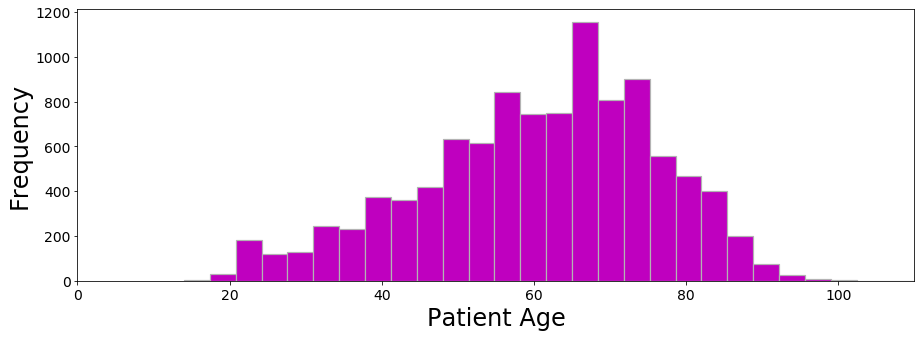

In [6]:
# Plot age distribution
fig = plt.figure(figsize=(15, 5), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

ax.hist(meta_data['age'].values, bins=30, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

ax.set_xlabel('Patient Age', fontsize=24)
ax.set_ylabel('Frequency', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim([0, 110])

plt.show()

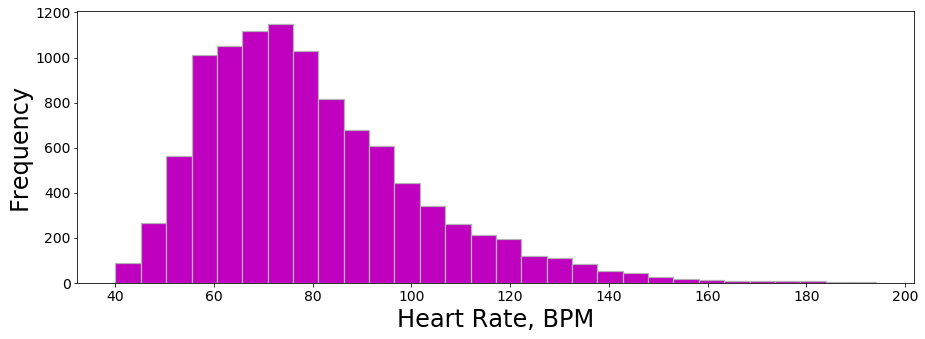

In [7]:
# Plot age distribution
fig = plt.figure(figsize=(15, 5), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

ax.hist(meta_data['hr'].values, bins=30, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

ax.set_xlabel('Heart Rate, BPM', fontsize=24)
ax.set_ylabel('Frequency', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# ax.set_xlim([0, 110])

plt.show()

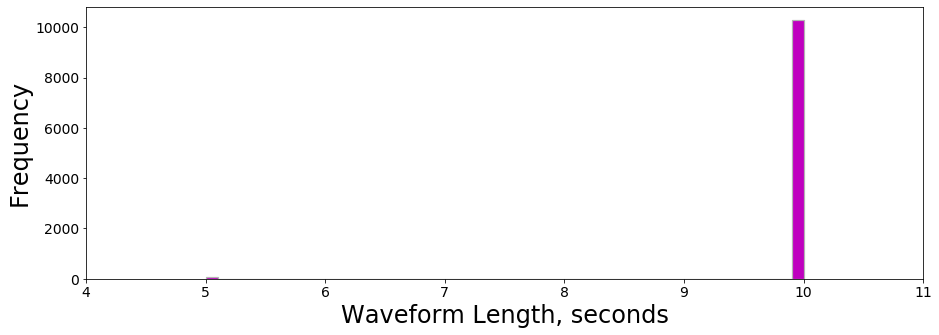

In [8]:
# Plot waveform length distribution
fig = plt.figure(figsize=(15, 5), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

ax.hist(meta_data['length'].values, bins=50, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

ax.set_xlabel('Waveform Length, seconds', fontsize=24)
ax.set_ylabel('Frequency', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim([4, 11])

plt.show()

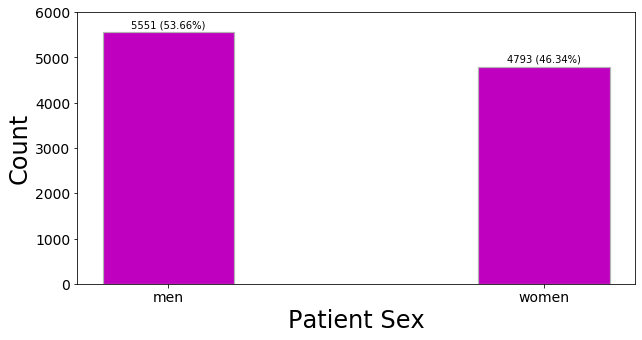

In [9]:
# Plot sex bar plot
labels = ['men', 'women']
sex_count = [meta_data['sex'][meta_data['sex'] == 'male'].shape[0], meta_data['sex'][meta_data['sex'] == 'female'].shape[0]]

x = np.arange(len(labels)) 
width = 0.35  

fig = plt.figure(figsize=(10, 5), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

rects1 = ax.bar(x, sex_count, width, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{} ({}%)'.format(height, np.round(height / meta_data.shape[0] * 100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

ax.set_xlabel('Patient Sex', fontsize=24)
ax.set_ylabel('Count', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim([0, 6000])
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

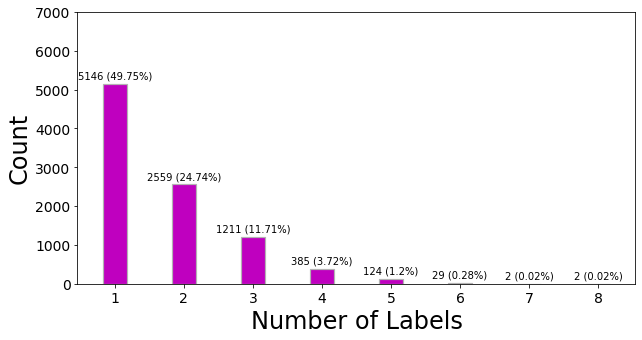

In [10]:
# Plot sex bar plot
labels = ['1', '2', '3', '4', '5', '6', '7', '8']
sex_count = [meta_data['label_count'][meta_data['label_count'] == 1].shape[0], 
             meta_data['label_count'][meta_data['label_count'] == 2].shape[0], 
             meta_data['label_count'][meta_data['label_count'] == 3].shape[0], 
             meta_data['label_count'][meta_data['label_count'] == 4].shape[0], 
             meta_data['label_count'][meta_data['label_count'] == 5].shape[0], 
             meta_data['label_count'][meta_data['label_count'] == 6].shape[0], 
             meta_data['label_count'][meta_data['label_count'] == 7].shape[0], 
             meta_data['label_count'][meta_data['label_count'] == 8].shape[0]]

x = np.arange(len(labels)) 
width = 0.35  

fig = plt.figure(figsize=(10, 5), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

rects1 = ax.bar(x, sex_count, width, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{} ({}%)'.format(height, np.round(height / meta_data.shape[0] * 100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

ax.set_xlabel('Number of Labels', fontsize=24)
ax.set_ylabel('Count', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim([0, 7000])
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

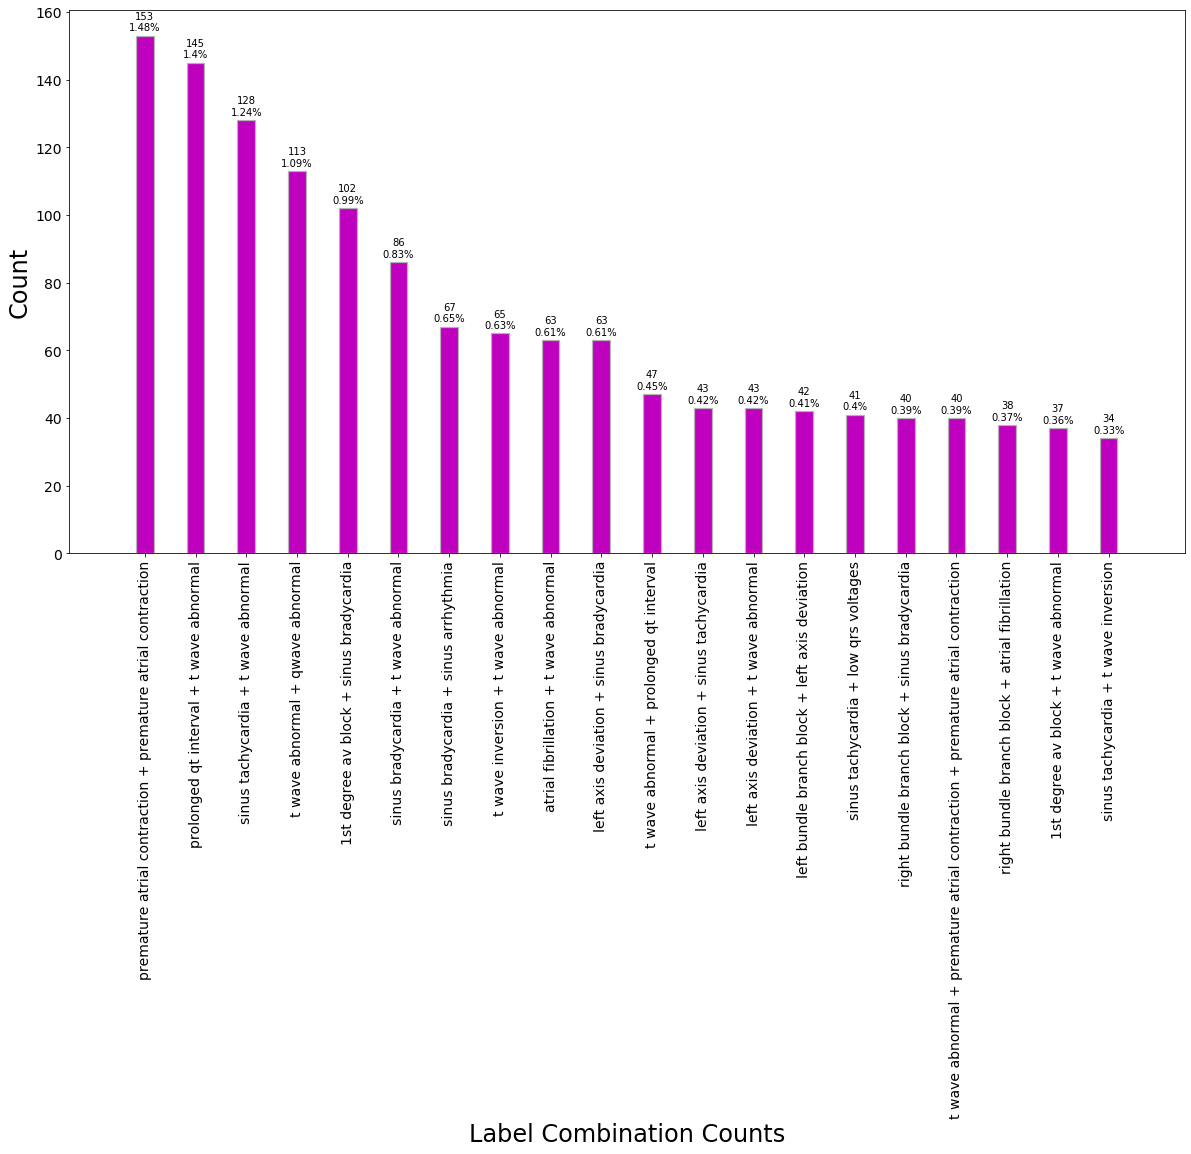

In [11]:
# Color list
colors = ['#E4FA42', '#FF9C44', '#2FA0AB', '#A233B5', '#AA3939', '#2E4172', '#958E49', '#04C304', '#00E5E5']

# Get list of labels
labels = [sorted(item['labels_full']) for item in meta_data_list if item['labels_full']]

# Plot sex bar plot
labels = meta_data[meta_data['label_count'] > 1].groupby('labels_concat')['filename'].nunique().sort_values(ascending=False).index.tolist()[0:20]
count = meta_data[meta_data['label_count'] > 1].groupby('labels_concat')['filename'].nunique().sort_values(ascending=False).values.tolist()[0:20]

x = np.arange(len(labels)) 
width = 0.35  

fig = plt.figure(figsize=(20, 10), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

rects1 = ax.bar(x, count, width, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}\n{}%'.format(height, np.round(height / meta_data.shape[0] * 100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

ax.set_xlabel('Label Combination Counts', fontsize=24)
ax.set_ylabel('Count', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim([-1.5, len(labels)+0.5])
#ax.set_ylim([0, 180])
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)

plt.show()

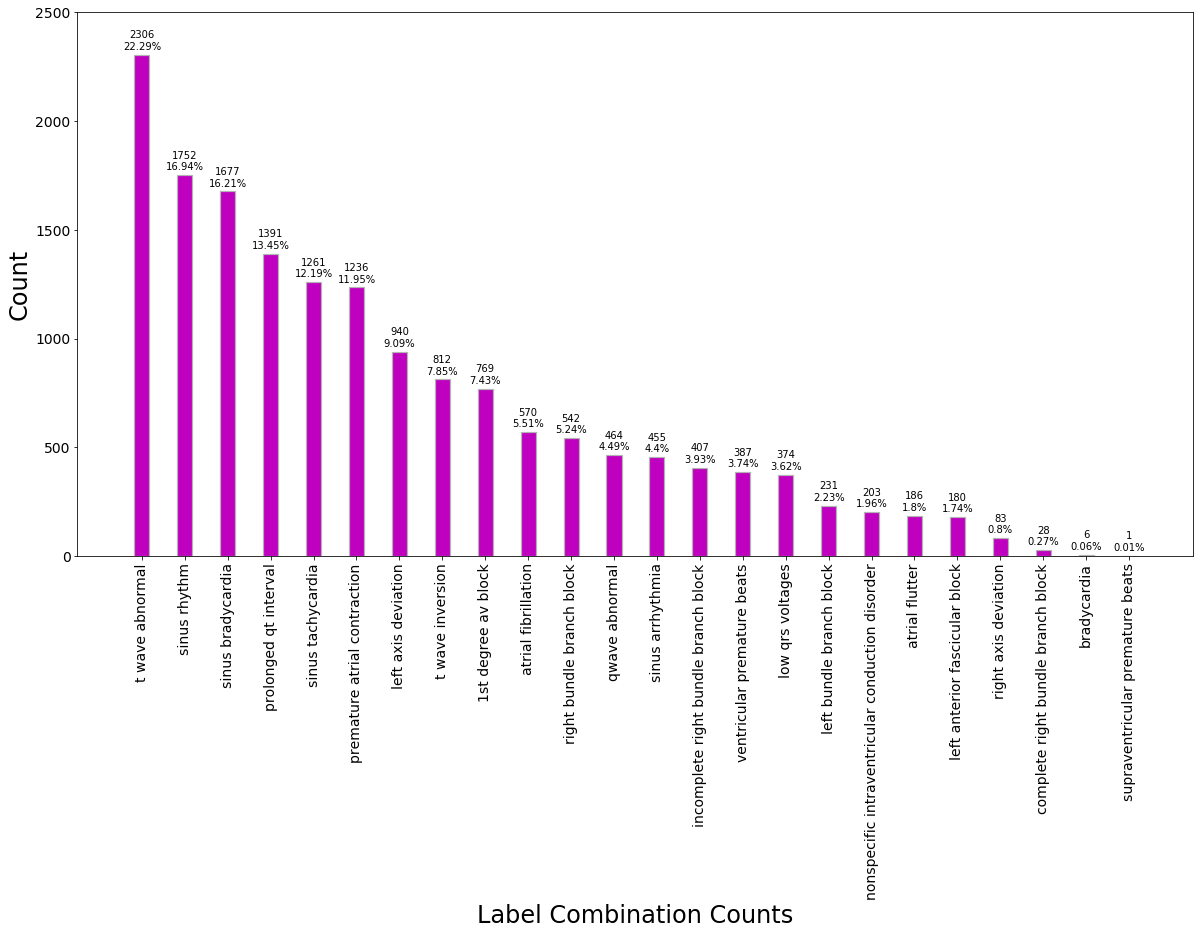

In [12]:
# Color list
colors = ['#E4FA42', '#FF9C44', '#2FA0AB', '#A233B5', '#AA3939', '#2E4172', '#958E49', '#04C304', '#00E5E5']

# Plot sex bar plot
labels = labels_df.groupby('label')['index'].nunique().sort_values(ascending=False).index.tolist()[0:44]
count = labels_df.groupby('label')['index'].nunique().sort_values(ascending=False).values.tolist()[0:44]

x = np.arange(len(labels)) 
width = 0.35  

fig = plt.figure(figsize=(20, 10), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

rects1 = ax.bar(x, count, width, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}\n{}%'.format(height, np.round(height / meta_data.shape[0] * 100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

ax.set_xlabel('Label Combination Counts', fontsize=24)
ax.set_ylabel('Count', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim([-1.5, len(labels)+0.5])
ax.set_ylim([0, 2500])
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)

plt.show()